In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import re
import sys

In [2]:
def find_coords(filename):
    holder = []
    with open(filename, "r") as vrml:
        for i, line in enumerate(vrml):
            if i > 16:
                for line in vrml:
                    if line[1] == ']':
                        vrml.close()
                        break
                    else:
                        line = line.strip(',\n')
                        #print(line)
                        new_line = line.split()
                        for j in range(len(new_line)):
                            new_line[j] = float(new_line[j])
                        holder.append(new_line)

                break
    return np.array(holder)
    #print(holder)

In [3]:
def Visualise2d(scan_array):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(scan_array[:,0],scan_array[:,1],s = 0.9)
    plt.show()

In [4]:
def leftright(scan_array):
    leftside = np.ones(3)
    rightside = np.ones(3)
    for i in range(np.shape(scan_array)[0]):
        if scan_array[i,2] >=0:
            rightside = np.vstack((rightside,scan_array[i,:]))
        if scan_array[i,2] < 0:
            leftside = np.vstack((leftside,scan_array[i,:]))

    leftside = np.delete(leftside,0,0)
    rightside = np.delete(rightside,0,0)

    maxleft = np.amax(leftside[:,0])
    maxright = np.amax(rightside[:,0])
    if maxright > maxleft:
        print('This is a left foot')
        foot = 0

    else:
        print('This is a right foot')
        foot = 1
    return foot

In [304]:
A = find_coords("000780.wrl")
A_2D = []
A_2D = np.c_[A[:, 2], A[:, 0]]
np.shape(A)

(6536L, 3L)

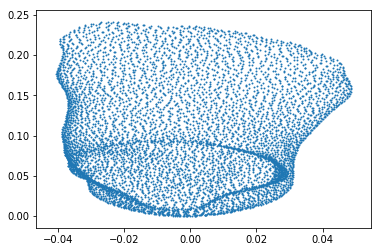

In [305]:
Visualise2d(A_2D)

In [306]:
foot = leftright(A)

This is a right foot


In [307]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
C = ConvexHull(A_2D)

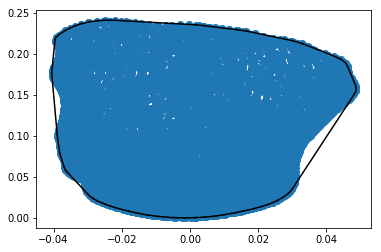

In [308]:
Convex_array = []
plt.plot(A_2D[:,0], A_2D[:,1], 'o')
for simplex in C.simplices:
    Convex_array.append(A_2D[simplex])
    plt.plot(A_2D[simplex, 0], A_2D[simplex, 1], 'k-')

In [309]:
Convex = np.zeros((np.shape(Convex_array)[0], np.shape(Convex_array)[1]))
for i in range(len(Convex_array)):
    for j in range(2):
        Convex[i] = Convex_array[i][j]

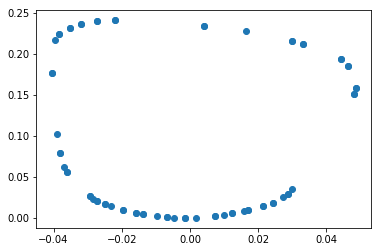

In [310]:
plt.plot(Convex[:,0], Convex[:,1], 'o')

In [311]:
A_array = []
for i in range(len(A_2D)):
    if A_2D[i, 1] > 0.16:
        A_array.append(A_2D[i]) 

In [312]:
A_new = np.zeros((np.shape(A_array)[0], np.shape(A_array)[1]))
for i in range(len(A_array)):
    A_new[i] = A_array[i]

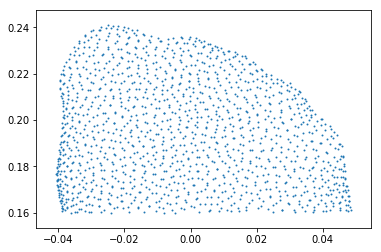

In [313]:
Visualise2d(A_new)

In [314]:
C_new = ConvexHull(A_new)

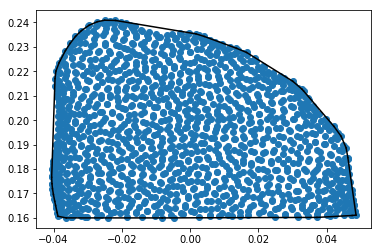

In [315]:
Convex_array = []
plt.plot(A_new[:,0], A_new[:,1], 'o')
for simplex in C_new.simplices:
    Convex_array.append(A_new[simplex])
    plt.plot(A_new[simplex, 0], A_new[simplex, 1], 'k-')

In [316]:
Convex = np.zeros((np.shape(Convex_array)[0], np.shape(Convex_array)[1]))
for i in range(len(Convex_array)):
    for j in range(2):
        Convex[i] = Convex_array[i][j]

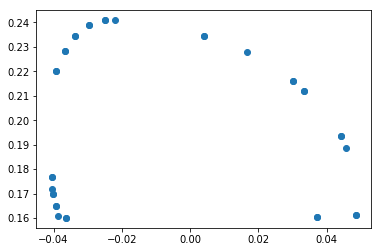

In [317]:
plt.plot(Convex[:,0], Convex[:,1], 'o')

In [318]:
Toe_line_array = []
for i in range (len(Convex)):
    if Convex[i][1] > 0.18:
        Toe_line_array.append(Convex[i])

In [319]:
Toe_line = np.zeros((np.shape(Toe_line_array)[0], np.shape(Toe_line_array)[1]))
for i in range(len(Toe_line_array)):
        Toe_line[i] = Toe_line_array[i]

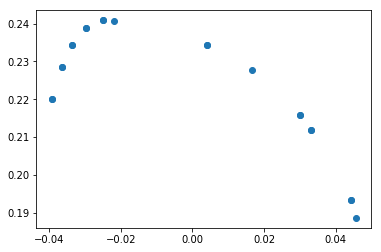

In [320]:
plt.plot(Toe_line[:,0], Toe_line[:,1], 'o')

In [321]:
max_pos = 0
max_value = 0


if foot == 0:
    for i in range (len(Toe_line)):
        j = Toe_line[i,1]
        if Toe_line[i][1] > max_value and Toe_line[i][0] > 0.01:
            max_value = Toe_line[i][1]
            max_pos = i
            
if foot == 1:
    for i in range (len(Toe_line)):
        j = Toe_line[i,1]
        if Toe_line[i][1] > max_value and Toe_line[i][0] < -0.01:
            max_value = Toe_line[i][1]
            max_pos = i

In [322]:
Toe_line_new_array = []
if foot == 0:
    for i in range(len(Toe_line)):
        if Toe_line[i][0] <= Toe_line[max_pos][0]:
            Toe_line_new_array.append(Toe_line[i])
if foot == 1:
    for i in range(len(Toe_line)):
        if Toe_line[i][0] >= Toe_line[max_pos][0]:
            Toe_line_new_array.append(Toe_line[i])

In [323]:
Toe_line_new = np.zeros((np.shape(Toe_line_new_array)[0], np.shape(Toe_line_new_array)[1]))
for i in range(len(Toe_line_new_array)):
        Toe_line_new[i] = Toe_line_new_array[i]

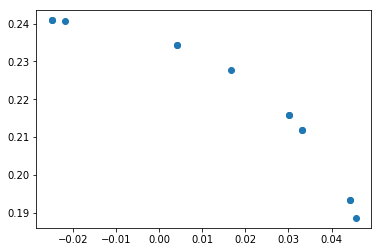

In [324]:
plt.plot(Toe_line_new[:,0], Toe_line_new[:,1], 'o')

In [325]:
"X axis"
x = (Toe_line_new[:,0])

"Y axis"
y = (Toe_line_new[:,1])

X = []
X = np.matrix(x)

Y = []
Y = np.matrix(y)

In [326]:
num_points = np.int(np.shape(X)[1])
k = num_points
n = 1

In [327]:
X = X.transpose()

In [328]:
X_mod = np.c_[np.ones(k), X]

In [329]:
Y_mod = np.transpose(Y)
Y_mod

matrix([[0.193391],
        [0.240875],
        [0.215953],
        [0.188669],
        [0.215953],
        [0.211969],
        [0.193391],
        [0.211969],
        [0.234266],
        [0.240788],
        [0.234266],
        [0.227697],
        [0.240875]])

In [330]:
def least_squares_variables():
    A = []
    j = 0
    A_whole = np.linalg.inv(np.transpose(X_mod) * X_mod) * np.transpose(X_mod) * Y_mod
    A.append(A_whole)
    return A
A = least_squares_variables()

In [331]:
"Initial line(s) of best fit"

Y_linear = np.zeros(np.shape(x))
j = 0
i = 0
for i in range(k):
    Y_linear[i] =  np.float(A[j][0]) + np.float(A[j][1]) * x[i]

In [332]:
"S = Linear Sum Squared Error"

def SSE():
    S_linear_each = []
    for i in range(k):
        S_i = np.sum(np.square((y[i] - Y_linear[i])))
        S_linear_each.append(S_i)
    return S_linear_each
SSE_linear = SSE()

In [333]:
SSE_linear

[5.53548569303706e-05,
 3.353397839730266e-05,
 3.274825387207398e-05,
 0.00012541310911341324,
 3.274825387207398e-05,
 1.481559372681996e-05,
 5.53548569303706e-05,
 1.481559372681996e-05,
 4.733083567723321e-05,
 1.4322898514589022e-05,
 4.733083567723321e-05,
 7.297138527350588e-05,
 3.353397839730266e-05]

In [334]:
X_mod = []
j = 0

X_mod = np.c_[np.ones(k), X]

In [335]:
p = 2

Y_polynomial = np.zeros(k)

SSE_polynomial_segment = [None] * 1
X_poly = [None] * 1


X_poly = np.c_[X_mod, np.power(X, 2), np.power(X, 3)]
A_polynomial = []
A_polynomial = np.linalg.inv(np.transpose(X_poly) * X_poly) * np.transpose(X_poly) * Y.transpose()

for i in range(k):
    Y_polynomial[i] =  (np.float(A_polynomial[0]) + np.float(A_polynomial[1]) * x[i] + 
                           np.float(A_polynomial[2]) * np.square(x[i]) + np.float(A_polynomial[3] * np.power(x[i], 3)))

In [336]:
A_polynomial

matrix([[   0.23537626],
        [  -0.26185708],
        [  -6.51878103],
        [-209.79103253]])

In [337]:
SSE_polynomial = []
for i in range(k):
    S_i = np.square((y[i] - Y_polynomial[i]))
    SSE_polynomial.append(S_i)   

In [338]:
#Y_ls = np.zeros(k)
#if SSE_polynomial < SSE_linear:
#    for i in range(0, k):
#       Y_ls[i] = Y_polynomial[i]
#else:
#    for i in range(0, k):
#        Y_ls[i] = Y_linear[i]

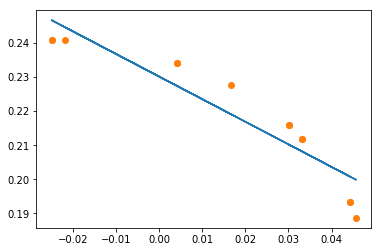

In [339]:
plt.plot(x, Y_linear)
plt.plot(Toe_line_new[:,0], Toe_line_new[:,1], 'o')

In [340]:
SSE_linear

[5.53548569303706e-05,
 3.353397839730266e-05,
 3.274825387207398e-05,
 0.00012541310911341324,
 3.274825387207398e-05,
 1.481559372681996e-05,
 5.53548569303706e-05,
 1.481559372681996e-05,
 4.733083567723321e-05,
 1.4322898514589022e-05,
 4.733083567723321e-05,
 7.297138527350588e-05,
 3.353397839730266e-05]

In [341]:
Average_lin_error = np.sum(SSE_linear) / len(SSE_linear)

In [342]:
Average_lin_error

4.463649462377761e-05

In [343]:
def gradient(x,y):
    m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
         ((np.mean(x)**2) - np.mean(x**2)))
    return m

In [344]:
m = gradient(x,Y_linear)
m

-0.6615968550828083

In [351]:
if Average_lin_error < 7e-05:
    print('The toe line is straight with a gradient of ' + str(m))
    
if Average_lin_error > 7e-05:
    print('The toe line is curved with a gradient of ' + str(m))

The toe line is straight with a gradient of -0.6615968550828083
